In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import class_weight

# Set a random seed for reproducibility
np.random.seed(42)

# --- 1. DATA LOADING AND PREPROCESSING (REPEATED FOR CONTEXT) ---
print("--- 1. Data Loading and Preprocessing ---")
try:
    df = pd.read_csv("covtype.csv")
except FileNotFoundError:
    print("Error: 'covtype.csv' not found. Please upload the file.")
    exit()

# Define feature groups
raw_features = df.columns[:10].tolist()
binary_features = df.columns[10:54].tolist()
target_feature = 'Cover_Type'

X = df.drop(columns=[target_feature])
Y = df[target_feature]

# Compute class weights (crucial for imbalanced data)
class_labels = np.unique(Y)
# 'balanced' mode automatically computes weights inversely proportional to class frequencies
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=class_labels,
    y=Y
)
# Convert to dictionary format required by LogisticRegression's class_weight parameter
class_weights_dict = dict(zip(class_labels, class_weights_array))

# Train-Test Split (with stratification)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)

# Preprocessing Pipeline (StandardScaler + PCA)
# PCA is kept to handle multicollinearity and reduce dimensions
raw_feature_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=7)) # Reducing 10 features to 7 components
])

preprocessor = ColumnTransformer(
    transformers=[
        ('raw', raw_feature_pipeline, raw_features),
        ('binary', 'passthrough', binary_features)
    ],
    remainder='drop'
)

# Apply preprocessing
print("Applying Preprocessing Pipeline (Scaling + PCA)...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print(f"Input feature dimension after preprocessing: {X_train_processed.shape[1]}")


# --- 2. LOGISTIC REGRESSION MODEL TRAINING ---
print("\n--- 2. Training Multinomial Logistic Regression Model ---")

# We must use 'lbfgs' or 'saga' for multi-class ('multinomial') with Sckit-learn
# 'lbfgs' is the default and generally works well.
# 'class_weight='balanced'' handles the imbalance, same as the dictionary we calculated.
lr_model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    C=1.0,  # Regularization parameter. C is inverse of regularization strength
    max_iter=500, # Increased max_iter for convergence
    class_weight=class_weights_dict,
    random_state=42,
    n_jobs=-1, # Use all available cores
    verbose=0
)

start_time = time.time()
lr_model.fit(X_train_processed, Y_train)
end_time = time.time()

print(f"Training completed in {end_time - start_time:.2f} seconds.")


# --- 3. MODEL EVALUATION ---
print("\n--- 3. Model Evaluation ---")

# Predictions
Y_pred = lr_model.predict(X_test_processed)

# Evaluation Metrics
test_accuracy = accuracy_score(Y_test, Y_pred)

print(f"Test Accuracy (Logistic Regression): {test_accuracy*100:.2f}%")

print("\n--- Classification Report (Logistic Regression) ---")
# Target names are 1 to 7
target_names = [f"Type {i}" for i in range(1, 8)]
print(classification_report(Y_test, Y_pred, target_names=target_names))

--- 1. Data Loading and Preprocessing ---


ValueError: classes should include all valid labels that can be in y

In [2]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import class_weight

# Set a random seed for reproducibility
np.random.seed(42)

# --- 1. DATA LOADING AND PREPROCESSING ---
print("--- 1. Data Loading and Preprocessing ---")
try:
    # Load the dataset (assuming 'covtype.csv' is accessible)
    df = pd.read_csv("covtype.csv")
except FileNotFoundError:
    print("Error: 'covtype.csv' not found. Please upload the file.")
    exit()

# Define feature groups
raw_features = df.columns[:10].tolist()
binary_features = df.columns[10:54].tolist()
target_feature = 'Cover_Type'

X = df.drop(columns=[target_feature])
Y = df[target_feature]

# --- FIX START ---
# Compute class weights (crucial for imbalanced data)
print("Computing Class Weights...")
# Use Y.values for explicit array of labels
class_labels = np.unique(Y.values)

# compute_class_weight requires classes and y to be arrays/lists
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=class_labels,
    y=Y.values # Use Y.values here as well for consistency
)

# Convert to dictionary format required by LogisticRegression.
# Keys must be the actual class labels (1 through 7).
class_weights_dict = dict(zip(class_labels, class_weights_array))
print(f"Class Weights (1-indexed): {class_weights_dict}")
# --- FIX END ---

# Train-Test Split (with stratification)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)

# Preprocessing Pipeline (StandardScaler + PCA)
raw_feature_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=7)) # Reducing 10 features to 7 components
])

preprocessor = ColumnTransformer(
    transformers=[
        ('raw', raw_feature_pipeline, raw_features),
        ('binary', 'passthrough', binary_features)
    ],
    remainder='drop'
)

# Apply preprocessing
print("Applying Preprocessing Pipeline (Scaling + PCA)...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print(f"Input feature dimension after preprocessing: {X_train_processed.shape[1]}")


# --- 2. LOGISTIC REGRESSION MODEL TRAINING ---
print("\n--- 2. Training Multinomial Logistic Regression Model ---")

# We use the computed class_weights_dict to handle imbalance.
# Increased max_iter and C=1.0 is default, but explicitly set for clarity.
lr_model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    C=1.0,
    max_iter=1000, # Increased max_iter, as convergence can be slow with many features
    class_weight=class_weights_dict, # Pass the dictionary with 1-7 keys
    random_state=42,
    n_jobs=-1,
    verbose=0
)

start_time = time.time()
lr_model.fit(X_train_processed, Y_train)
end_time = time.time()

print(f"Training completed in {end_time - start_time:.2f} seconds.")


# --- 3. MODEL EVALUATION ---
print("\n--- 3. Model Evaluation ---")

# Predictions
Y_pred = lr_model.predict(X_test_processed)

# Evaluation Metrics
test_accuracy = accuracy_score(Y_test, Y_pred)

print(f"Test Accuracy (Logistic Regression): {test_accuracy*100:.2f}%")

print("\n--- Classification Report (Logistic Regression) ---")
target_names = [f"Type {i}" for i in range(1, 8)]
print(classification_report(Y_test, Y_pred, target_names=target_names))

--- 1. Data Loading and Preprocessing ---
Computing Class Weights...
Class Weights (1-indexed): {np.int64(1): np.float64(0.391813228312473), np.int64(2): np.float64(0.292980661154441), np.int64(3): np.float64(2.321466529219508), np.int64(4): np.float64(30.215403817151177), np.int64(5): np.float64(8.743465109629652), np.int64(6): np.float64(4.77927761189119), np.int64(7): np.float64(4.046890018806157)}
Applying Preprocessing Pipeline (Scaling + PCA)...
Input feature dimension after preprocessing: 51

--- 2. Training Multinomial Logistic Regression Model ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training completed in 67.00 seconds.

--- 3. Model Evaluation ---
Test Accuracy (Logistic Regression): 58.20%

--- Classification Report (Logistic Regression) ---
              precision    recall  f1-score   support

      Type 1       0.66      0.66      0.66     42368
      Type 2       0.77      0.50      0.60     56661
      Type 3       0.68      0.54      0.60      7151
      Type 4       0.29      0.89      0.44       549
      Type 5       0.10      0.77      0.18      1899
      Type 6       0.31      0.64      0.42      3473
      Type 7       0.40      0.88      0.55      4102

    accuracy                           0.58    116203
   macro avg       0.46      0.70      0.49    116203
weighted avg       0.69      0.58      0.61    116203



In [4]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, make_scorer, f1_score
from sklearn.utils import class_weight

# Set a random seed for reproducibility
np.random.seed(42)

# --- 1. DATA LOADING AND PREPROCESSING (Setup) ---
print("--- 1. Data Loading and Preprocessing Setup ---")
try:
    df = pd.read_csv("covtype.csv")
except FileNotFoundError:
    print("Error: 'covtype.csv' not found. Please upload the file.")
    exit()

raw_features = df.columns[:10].tolist()
binary_features = df.columns[10:54].tolist()
target_feature = 'Cover_Type'

X = df.drop(columns=[target_feature])
Y = df[target_feature]

# Compute class weights (using your previous output)
class_labels = np.unique(Y.values)
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=class_labels,
    y=Y.values
)
class_weights_dict = dict(zip(class_labels, class_weights_array))
print("Class Weights calculated.")

# Train-Test Split (with stratification)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)

# Preprocessing Pipeline (StandardScaler + PCA)
raw_feature_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=7))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('raw', raw_feature_pipeline, raw_features),
        ('binary', 'passthrough', binary_features)
    ],
    remainder='drop'
)

# Apply preprocessing (Fit on training, transform both)
print("Applying Preprocessing Pipeline...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print(f"Input feature dimension after preprocessing: {X_train_processed.shape[1]}")


# --- 2. HYPERPARAMETER TUNING (GridSearchCV for C) ---
print("\n--- 2. Starting Hyperparameter Tuning (GridSearchCV for C) ---")

# Define the model base
lr_base = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000, # Must be high for convergence
    class_weight=class_weights_dict,
    random_state=42,
    n_jobs=-1
)

# Define the hyperparameter grid for C
# C values are typically explored on a logarithmic scale
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Define the scoring metric: macro F1-score is best for imbalanced data
macro_f1_scorer = make_scorer(f1_score, average='macro')

# Setup GridSearchCV
# cv=3 is used to speed up the tuning process
grid_search = GridSearchCV(
    estimator=lr_base,
    param_grid=param_grid,
    scoring=macro_f1_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)

start_time = time.time()
grid_search.fit(X_train_processed, Y_train)
end_time = time.time()

print(f"\nGrid Search completed in {end_time - start_time:.2f} seconds.")


# --- 3. EVALUATION OF BEST MODEL ---
print("\n--- 3. Evaluation of Best Tuned Logistic Regression Model ---")

# Get the best estimator and parameters
best_lr_model = grid_search.best_estimator_
best_C = grid_search.best_params_['C']
print(f"Optimal Regularization parameter (C): {best_C}")
print(f"Best Cross-Validated Macro F1-Score: {grid_search.best_score_:.4f}")

# Predict on the test set using the best model
Y_pred_tuned = best_lr_model.predict(X_test_processed)

# Final Metrics
test_accuracy_tuned = accuracy_score(Y_test, Y_pred_tuned)

print(f"\nTest Accuracy (Tuned LR, C={best_C}): {test_accuracy_tuned*100:.2f}%")

print("\n--- Classification Report (Tuned Logistic Regression) ---")
target_names = [f"Type {i}" for i in range(1, 8)]
print(classification_report(Y_test, Y_pred_tuned, target_names=target_names))

--- 1. Data Loading and Preprocessing Setup ---
Class Weights calculated.
Applying Preprocessing Pipeline...
Input feature dimension after preprocessing: 51

--- 2. Starting Hyperparameter Tuning (GridSearchCV for C) ---
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Grid Search completed in 540.53 seconds.

--- 3. Evaluation of Best Tuned Logistic Regression Model ---
Optimal Regularization parameter (C): 1.0
Best Cross-Validated Macro F1-Score: 0.4924

Test Accuracy (Tuned LR, C=1.0): 58.20%

--- Classification Report (Tuned Logistic Regression) ---
              precision    recall  f1-score   support

      Type 1       0.66      0.66      0.66     42368
      Type 2       0.77      0.50      0.60     56661
      Type 3       0.68      0.54      0.60      7151
      Type 4       0.29      0.89      0.44       549
      Type 5       0.10      0.77      0.18      1899
      Type 6       0.31      0.64      0.42      3473
      Type 7       0.40      0.88      0.55      4102

    accuracy                           0.58    116203
   macro avg       0.46      0.70      0.49    116203
weighted avg       0.69      0.58      0.61    116203



In [5]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC # Faster for large datasets with linear kernel
from sklearn.metrics import classification_report, f1_score, make_scorer
from sklearn.utils import class_weight

# Set a random seed for reproducibility
np.random.seed(42)

# Define the target sample size for SVM training
# 50,000 is chosen as a computationally feasible size for LinearSVC tuning.
TRAINING_SAMPLE_SIZE = 50000

# --- 1. DATA LOADING AND INITIAL SPLIT ---
print("--- 1. Data Loading and Initial Split ---")
try:
    df = pd.read_csv("covtype.csv")
except FileNotFoundError:
    print("Error: 'covtype.csv' not found. Please upload the file.")
    exit()

# Define feature groups
raw_features = df.columns[:10].tolist()
binary_features = df.columns[10:54].tolist()
target_feature = 'Cover_Type'

X = df.drop(columns=[target_feature])
Y = df[target_feature]

# Train-Test Split (Full Data) - Test set remains large for final evaluation
X_train_full, X_test_full, Y_train_full, Y_test_full = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)
print(f"Full Training set size: {len(X_train_full)}")
print(f"Full Testing set size: {len(X_test_full)}")

# --- 2. SAMPLING FOR SVM TRAINING (Stratified Undersampling) ---
print(f"\n--- 2. Creating Stratified Sample for SVM Training (N={TRAINING_SAMPLE_SIZE}) ---")

# Calculate the required fraction to sample from the full training set
sample_fraction = TRAINING_SAMPLE_SIZE / len(X_train_full)

# Create the training subset for SVM
_, X_train_sample, _, Y_train_sample = train_test_split(
    X_train_full, Y_train_full, test_size=sample_fraction, stratify=Y_train_full, random_state=42
)
print(f"SVM Training Sample size: {len(X_train_sample)}")

# Compute class weights for the SVM model
class_labels = np.unique(Y_train_sample.values)
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=class_labels,
    y=Y_train_sample.values
)
class_weights_dict = dict(zip(class_labels, class_weights_array))


# --- 3. PREPROCESSING PIPELINE WITH FEATURE ENGINEERING ---
print("\n--- 3. Defining Preprocessing Pipeline with Feature Engineering ---")

# 3a. Pipeline for Raw Features: PCA + Polynomial Features + Scaling
raw_feature_pipeline = Pipeline(steps=[
    ('pca', PCA(n_components=7)),                     # 1. Reduce original 10 features to 7 (for correlation)
    ('poly', PolynomialFeatures(degree=2, include_bias=False)), # 2. Add non-linear interactions (7*8/2 = 28 features)
    ('scaler', StandardScaler())                      # 3. Scale everything (CRUCIAL for SVM)
])

# 3b. Column Transformer: Apply different transformations to feature groups
preprocessor = ColumnTransformer(
    transformers=[
        ('raw_pipe', raw_feature_pipeline, raw_features), # Raw features get the full treatment
        ('binary', StandardScaler(), binary_features)      # Binary features are scaled too, but only StandardScaled (LinearSVC prefers scaled features)
    ],
    remainder='drop'
)

# --- 4. MODEL DEFINITION AND GRID SEARCH SETUP ---

# Define the model base (LinearSVC is used for speed)
# We must use the 'squared_hinge' loss for compatibility with class_weight='balanced'
# Increased max_iter for convergence on complex data
svm_base = LinearSVC(
    penalty='l2',
    loss='squared_hinge',
    dual=False, # Set dual=False when n_samples > n_features, which will be the case after poly features.
    max_iter=5000,
    class_weight=class_weights_dict, # Use the computed class weights
    random_state=42,
)

# Define the hyperparameter grid for C (Regularization)
# C values are explored on a logarithmic scale
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0]
}

# Define the scoring metric: Macro F1-score (best for imbalanced classification)
macro_f1_scorer = make_scorer(f1_score, average='macro')

# Create the full pipeline for tuning (Preprocessor + Model)
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', svm_base)])

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid,
    scoring=macro_f1_scorer,
    cv=3, # 3-fold cross-validation on the training sample
    verbose=2,
    n_jobs=-1
)

# --- 5. START TUNING AND TRAINING ---
print("\n--- 5. Starting SVM Hyperparameter Tuning (GridSearchCV for C) ---")

start_time = time.time()
# Fit the pipeline on the small stratified sample
grid_search.fit(X_train_sample, Y_train_sample)
end_time = time.time()

print(f"\nGrid Search completed in {end_time - start_time:.2f} seconds.")


# --- 6. EVALUATION OF BEST MODEL ON FULL TEST SET ---
print("\n--- 6. Evaluation of Best Tuned LinearSVC Model ---")

# Get the best estimator and parameters
best_svm_pipeline = grid_search.best_estimator_
best_C = grid_search.best_params_['classifier__C']

print(f"Optimal Regularization parameter (C): {best_C}")
print(f"Best Cross-Validated Macro F1-Score on Sample: {grid_search.best_score_:.4f}")

# Predict on the *full original test set*
Y_pred_tuned = best_svm_pipeline.predict(X_test_full)

# Final Metrics
test_accuracy_tuned = best_svm_pipeline.score(X_test_full, Y_test_full)

print(f"\nTest Accuracy (Tuned LinearSVC, C={best_C}) on FULL Test Set: {test_accuracy_tuned*100:.2f}%")

print("\n--- Classification Report (Tuned LinearSVC) ---")
target_names = [f"Type {i}" for i in range(1, 8)]
print(classification_report(Y_test_full, Y_pred_tuned, target_names=target_names))


--- 1. Data Loading and Initial Split ---
Full Training set size: 464809
Full Testing set size: 116203

--- 2. Creating Stratified Sample for SVM Training (N=50000) ---
SVM Training Sample size: 50000

--- 3. Defining Preprocessing Pipeline with Feature Engineering ---

--- 5. Starting SVM Hyperparameter Tuning (GridSearchCV for C) ---
Fitting 3 folds for each of 4 candidates, totalling 12 fits


ValueError: Invalid parameter 'C' for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('raw_pipe',
                                                  Pipeline(steps=[('pca',
                                                                   PCA(n_components=7)),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Elevation', 'Aspect',
                                                   'Slope',
                                                   'Horizontal_Distance_To_Hydrology',
                                                   'Vertical_Distance_To_Hydrology',
                                                   'Horizontal_Distance_To_Roadways',
                                                   'Hillshade_9am',
                                                   'Hil...
                 LinearSVC(class_weight={np.int64(1): np.float64(0.39181882297625575),
                                         np.int64(2): np.float64(0.29298019453884916),
                                         np.int64(3): np.float64(2.321370537165142),
                                         np.int64(4): np.float64(30.26634382566586),
                                         np.int64(5): np.float64(8.742787200559539),
                                         np.int64(6): np.float64(4.777830864787386),
                                         np.int64(7): np.float64(4.046944556859571)},
                           dual=False, max_iter=5000, random_state=42))]). Valid parameters are: ['memory', 'steps', 'transform_input', 'verbose'].

In [3]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, make_scorer
from sklearn.utils import class_weight

# Set a random seed for reproducibility
np.random.seed(42)

# Define the target sample size for SVM training
TRAINING_SAMPLE_SIZE = 50000

# --- 1. DATA LOADING AND INITIAL SPLIT ---
print("--- 1. Data Loading and Initial Split ---")
try:
    df = pd.read_csv("covtype.csv")
except FileNotFoundError:
    print("Error: 'covtype.csv' not found. Please upload the file.")
    exit()

# --- FIX: Ensure no NaN values remain before splitting ---
# This is the most reliable way to prevent the "Input y contains NaN" error.
initial_rows = len(df)
df.dropna(inplace=True)
if len(df) < initial_rows:
    print(f"Warning: Removed {initial_rows - len(df)} rows containing NaNs.")
# --------------------------------------------------------

# Define feature groups
raw_features = df.columns[:10].tolist()
binary_features = df.columns[10:54].tolist()
target_feature = 'Cover_Type'

X = df.drop(columns=[target_feature])
Y = df[target_feature]

# Train-Test Split (Full Data)
X_train_full, X_test_full, Y_train_full, Y_test_full = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)
print(f"Full Training set size: {len(X_train_full)}")
print(f"Full Testing set size: {len(X_test_full)}")

# --- 2. SAMPLING FOR SVM TRAINING (Stratified Undersampling) ---
print(f"\n--- 2. Creating Stratified Sample for SVM Training (N={TRAINING_SAMPLE_SIZE}) ---")

sample_fraction = TRAINING_SAMPLE_SIZE / len(X_train_full)

# Create the training subset for SVM
_, X_train_sample, _, Y_train_sample = train_test_split(
    X_train_full, Y_train_full, test_size=sample_fraction, stratify=Y_train_full, random_state=42
)
print(f"SVM Training Sample size: {len(X_train_sample)}")

# Compute class weights for the SVM model
class_labels = np.unique(Y_train_sample.values)
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=class_labels,
    y=Y_train_sample.values
)
class_weights_dict = dict(zip(class_labels, class_weights_array))


# --- 3. PREPROCESSING PIPELINE WITH FEATURE ENGINEERING ---
print("\n--- 3. Defining Preprocessing Pipeline with Feature Engineering ---")

raw_feature_pipeline = Pipeline(steps=[
    ('pca', PCA(n_components=7)),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('raw_pipe', raw_feature_pipeline, raw_features),
        ('binary', StandardScaler(), binary_features)
    ],
    remainder='drop'
)

# --- 4. MODEL DEFINITION AND GRID SEARCH SETUP ---

# Define the model base (LinearSVC is used for speed)
svm_base = LinearSVC(
    penalty='l2',
    loss='squared_hinge',
    dual=False,
    max_iter=5000,
    class_weight=class_weights_dict,
    random_state=42,
)

# Parameter name must be prefixed with the step name 'classifier__'
param_grid = {
    'classifier__C': [0.01, 0.1, 1.0, 10.0]
}

# Define the scoring metric: Macro F1-score
macro_f1_scorer = make_scorer(f1_score, average='macro')

# Create the full pipeline for tuning (Preprocessor + Model)
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', svm_base)])

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid,
    scoring=macro_f1_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# --- 5. START TUNING AND TRAINING ---
print("\n--- 5. Starting SVM Hyperparameter Tuning (GridSearchCV for C) ---")

start_time = time.time()
# Fit the pipeline on the small stratified sample
grid_search.fit(X_train_sample, Y_train_sample)
end_time = time.time()

print(f"\nGrid Search completed in {end_time - start_time:.2f} seconds.")


# --- 6. EVALUATION OF BEST MODEL ON FULL TEST SET ---
print("\n--- 6. Evaluation of Best Tuned LinearSVC Model ---")

# Get the best estimator and parameters
best_svm_pipeline = grid_search.best_estimator_
best_C = grid_search.best_params_['classifier__C']

print(f"Optimal Regularization parameter (C): {best_C}")
print(f"Best Cross-Validated Macro F1-Score on Sample: {grid_search.best_score_:.4f}")

# Predict on the *full original test set*
Y_pred_tuned = best_svm_pipeline.predict(X_test_full)

# Final Metrics
test_accuracy_tuned = best_svm_pipeline.score(X_test_full, Y_test_full)

print(f"\nTest Accuracy (Tuned LinearSVC, C={best_C}) on FULL Test Set: {test_accuracy_tuned*100:.2f}%")

print("\n--- Classification Report (Tuned LinearSVC) ---")
target_names = [f"Type {i}" for i in range(1, 8)]
print(classification_report(Y_test_full, Y_pred_tuned, target_names=target_names))

--- 1. Data Loading and Initial Split ---
Full Training set size: 464809
Full Testing set size: 116203

--- 2. Creating Stratified Sample for SVM Training (N=50000) ---
SVM Training Sample size: 50000

--- 3. Defining Preprocessing Pipeline with Feature Engineering ---

--- 5. Starting SVM Hyperparameter Tuning (GridSearchCV for C) ---
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Grid Search completed in 329.54 seconds.

--- 6. Evaluation of Best Tuned LinearSVC Model ---
Optimal Regularization parameter (C): 10.0
Best Cross-Validated Macro F1-Score on Sample: 0.5920

Test Accuracy (Tuned LinearSVC, C=10.0) on FULL Test Set: 68.98%

--- Classification Report (Tuned LinearSVC) ---


NameError: name 'classification_report' is not defined

In [6]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score, make_scorer
from sklearn.utils import class_weight

# Set a random seed for reproducibility
np.random.seed(42)

# Define the target sample size for SVM training
TRAINING_SAMPLE_SIZE = 50000

# --- 1. DATA LOADING AND INITIAL SPLIT ---
print("--- 1. Data Loading and Initial Split ---")
try:
    df = pd.read_csv("covtype.csv")
except FileNotFoundError:
    print("Error: 'covtype.csv' not found. Please upload the file.")
    exit()

# --- FIX: Ensure no NaN values remain before splitting ---
# This is the most reliable way to prevent the "Input y contains NaN" error.
initial_rows = len(df)
df.dropna(inplace=True)
if len(df) < initial_rows:
    print(f"Warning: Removed {initial_rows - len(df)} rows containing NaNs.")
# --------------------------------------------------------

# Define feature groups
raw_features = df.columns[:10].tolist()
binary_features = df.columns[10:54].tolist()
target_feature = 'Cover_Type'

X = df.drop(columns=[target_feature])
Y = df[target_feature]

# Train-Test Split (Full Data)
X_train_full, X_test_full, Y_train_full, Y_test_full = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)
print(f"Full Training set size: {len(X_train_full)}")
print(f"Full Testing set size: {len(X_test_full)}")

# --- 2. SAMPLING FOR SVM TRAINING (Stratified Undersampling) ---
print(f"\n--- 2. Creating Stratified Sample for SVM Training (N={TRAINING_SAMPLE_SIZE}) ---")

sample_fraction = TRAINING_SAMPLE_SIZE / len(X_train_full)

# Create the training subset for SVM
_, X_train_sample, _, Y_train_sample = train_test_split(
    X_train_full, Y_train_full, test_size=sample_fraction, stratify=Y_train_full, random_state=42
)
print(f"SVM Training Sample size: {len(X_train_sample)}")

# Compute class weights for the SVM model
class_labels = np.unique(Y_train_sample.values)
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=class_labels,
    y=Y_train_sample.values
)
class_weights_dict = dict(zip(class_labels, class_weights_array))


# --- 3. PREPROCESSING PIPELINE WITH FEATURE ENGINEERING ---
print("\n--- 3. Defining Preprocessing Pipeline with Feature Engineering ---")

raw_feature_pipeline = Pipeline(steps=[
    ('pca', PCA(n_components=7)),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('raw_pipe', raw_feature_pipeline, raw_features),
        ('binary', StandardScaler(), binary_features)
    ],
    remainder='drop'
)

# --- 4. MODEL DEFINITION AND GRID SEARCH SETUP ---

# Define the model base (LinearSVC is used for speed)
svm_base = LinearSVC(
    penalty='l2',
    loss='squared_hinge',
    dual=False,
    max_iter=5000,
    class_weight=class_weights_dict,
    random_state=42,
)

# Parameter name must be prefixed with the step name 'classifier__'
param_grid = {
    'classifier__C': [0.01, 0.1, 1.0, 10.0]
}

# Define the scoring metric: Macro F1-score
macro_f1_scorer = make_scorer(f1_score, average='macro')

# Create the full pipeline for tuning (Preprocessor + Model)
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', svm_base)])

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid,
    scoring=macro_f1_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# --- 5. START TUNING AND TRAINING ---
print("\n--- 5. Starting SVM Hyperparameter Tuning (GridSearchCV for C) ---")

start_time = time.time()
# Fit the pipeline on the small stratified sample
grid_search.fit(X_train_sample, Y_train_sample)
end_time = time.time()

print(f"\nGrid Search completed in {end_time - start_time:.2f} seconds.")


# --- 6. EVALUATION OF BEST MODEL ON FULL TEST SET ---
print("\n--- 6. Evaluation of Best Tuned LinearSVC Model ---")

# Get the best estimator and parameters
best_svm_pipeline = grid_search.best_estimator_
best_C = grid_search.best_params_['classifier__C']

print(f"Optimal Regularization parameter (C): {best_C}")
print(f"Best Cross-Validated Macro F1-Score on Sample: {grid_search.best_score_:.4f}")

# Predict on the *full original test set*
Y_pred_tuned = best_svm_pipeline.predict(X_test_full)

# Final Metrics
test_accuracy_tuned = best_svm_pipeline.score(X_test_full, Y_test_full)

print(f"\nTest Accuracy (Tuned LinearSVC, C={best_C}) on FULL Test Set: {test_accuracy_tuned*100:.2f}%")

print("\n--- Classification Report (Tuned LinearSVC) ---")
target_names = [f"Type {i}" for i in range(1, 8)]
print(classification_report(Y_test_full, Y_pred_tuned, target_names=target_names))

--- 1. Data Loading and Initial Split ---
Full Training set size: 464809
Full Testing set size: 116203

--- 2. Creating Stratified Sample for SVM Training (N=50000) ---
SVM Training Sample size: 50000

--- 3. Defining Preprocessing Pipeline with Feature Engineering ---

--- 5. Starting SVM Hyperparameter Tuning (GridSearchCV for C) ---
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Grid Search completed in 345.07 seconds.

--- 6. Evaluation of Best Tuned LinearSVC Model ---
Optimal Regularization parameter (C): 10.0
Best Cross-Validated Macro F1-Score on Sample: 0.5920

Test Accuracy (Tuned LinearSVC, C=10.0) on FULL Test Set: 68.98%

--- Classification Report (Tuned LinearSVC) ---
              precision    recall  f1-score   support

      Type 1       0.72      0.68      0.70     42368
      Type 2       0.78      0.69      0.73     56661
      Type 3       0.69      0.72      0.71      7151
      Type 4       0.52      0.74      0.61       549
      Type 5       0.18      0.56      0.27      1899
      Type 6       0.40      0.59      0.48      3473
      Type 7       0.53      0.86      0.65      4102

    accuracy                           0.69    116203
   macro avg       0.54      0.69      0.59    116203
weighted avg       0.72      0.69      0.70    116203



In [7]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score, make_scorer, accuracy_score
from sklearn.utils import class_weight

# Set a random seed for reproducibility
np.random.seed(42)

# Define the target sample size for SVM training
# This is crucial for making SVM training feasible
TRAINING_SAMPLE_SIZE = 50000

# --- 1. DATA LOADING AND INITIAL SPLIT ---
print("--- 1. Data Loading and Initial Split ---")
try:
    df = pd.read_csv("covtype.csv")
except FileNotFoundError:
    print("Error: 'covtype.csv' not found. Please upload the file.")
    exit()

# Ensure data is clean (though initial check showed no NaNs, this is for robustness)
df.dropna(inplace=True)

# Define feature groups
raw_features = df.columns[:10].tolist()
binary_features = df.columns[10:54].tolist()
target_feature = 'Cover_Type'

X = df.drop(columns=[target_feature])
Y = df[target_feature]

# Train-Test Split (Full Data) - Test set remains large for final evaluation
X_train_full, X_test_full, Y_train_full, Y_test_full = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)
print(f"Full Training set size: {len(X_train_full)}")
print(f"Full Testing set size: {len(X_test_full)}")

# --- 2. SAMPLING FOR SVM TRAINING (Stratified Undersampling) ---
print(f"\n--- 2. Creating Stratified Sample for SVM Training (N={TRAINING_SAMPLE_SIZE}) ---")

sample_fraction = TRAINING_SAMPLE_SIZE / len(X_train_full)

# Create the training subset for SVM
# Note: We take a sample FROM the training set (X_train_full)
_, X_train_sample, _, Y_train_sample = train_test_split(
    X_train_full, Y_train_full, test_size=sample_fraction, stratify=Y_train_full, random_state=42
)
print(f"SVM Training Sample size: {len(X_train_sample)}")

# Compute class weights for the SVM model (based on the sample)
class_labels = np.unique(Y_train_sample.values)
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=class_labels,
    y=Y_train_sample.values
)
class_weights_dict = dict(zip(class_labels, class_weights_array))


# --- 3. PREPROCESSING PIPELINE WITH FEATURE ENGINEERING ---
print("\n--- 3. Defining Preprocessing Pipeline with Feature Engineering ---")

# Raw feature pipeline: PCA -> Polynomial Features -> Scaling (CRUCIAL for LinearSVC)
raw_feature_pipeline = Pipeline(steps=[
    ('pca', PCA(n_components=7)),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)), # Feature Engineering
    ('scaler', StandardScaler())
])

# Column Transformer: Applies different steps to raw and binary features
preprocessor = ColumnTransformer(
    transformers=[
        ('raw_pipe', raw_feature_pipeline, raw_features),
        ('binary', StandardScaler(), binary_features) # Scaling binary features is generally safe/preferred for LinearSVC
    ],
    remainder='drop'
)

# --- 4. MODEL DEFINITION AND GRID SEARCH SETUP ---

# Define the model base (LinearSVC)
svm_base = LinearSVC(
    penalty='l2',
    loss='squared_hinge',
    dual=False, # Faster when n_samples > n_features
    max_iter=5000, # Increased iterations for convergence
    class_weight=class_weights_dict,
    random_state=42,
)

# Create the full pipeline (Preprocessor + Classifier)
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', svm_base)])

# Hyperparameter grid for C (Regularization) - CORRECTED NAME
param_grid = {
    'classifier__C': [0.01, 0.1, 1.0, 10.0] # Must use 'classifier__' prefix
}

# Scoring metric: Macro F1-score
macro_f1_scorer = make_scorer(f1_score, average='macro')

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid,
    scoring=macro_f1_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# --- 5. START TUNING AND TRAINING ---
print("\n--- 5. Starting SVM Hyperparameter Tuning (GridSearchCV for C) ---")

start_time = time.time()
# Fit the pipeline on the small stratified sample
grid_search.fit(X_train_sample, Y_train_sample)
end_time = time.time()

print(f"\nGrid Search completed in {end_time - start_time:.2f} seconds.")


# --- 6. EVALUATION OF BEST MODEL ON FULL TEST SET ---
print("\n--- 6. Evaluation of Best Tuned LinearSVC Model ---")

# Get the best estimator and parameters
best_svm_pipeline = grid_search.best_estimator_
best_C = grid_search.best_params_['classifier__C']

print(f"Optimal Regularization parameter (C): {best_C}")
print(f"Best Cross-Validated Macro F1-Score on Sample: {grid_search.best_score_:.4f}")

# Predict on the *full original test set*
Y_pred_tuned = best_svm_pipeline.predict(X_test_full)

# Final Metrics
test_accuracy_tuned = accuracy_score(Y_test_full, Y_pred_tuned)

print(f"\nTest Accuracy (Tuned LinearSVC, C={best_C}) on FULL Test Set: {test_accuracy_tuned*100:.2f}%")

print("\n--- Classification Report (Tuned LinearSVC) ---")
target_names = [f"Type {i}" for i in range(1, 8)]
print(classification_report(Y_test_full, Y_pred_tuned, target_names=target_names))

--- 1. Data Loading and Initial Split ---
Full Training set size: 464809
Full Testing set size: 116203

--- 2. Creating Stratified Sample for SVM Training (N=50000) ---
SVM Training Sample size: 50000

--- 3. Defining Preprocessing Pipeline with Feature Engineering ---

--- 5. Starting SVM Hyperparameter Tuning (GridSearchCV for C) ---
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Grid Search completed in 372.85 seconds.

--- 6. Evaluation of Best Tuned LinearSVC Model ---
Optimal Regularization parameter (C): 10.0
Best Cross-Validated Macro F1-Score on Sample: 0.5920

Test Accuracy (Tuned LinearSVC, C=10.0) on FULL Test Set: 68.98%

--- Classification Report (Tuned LinearSVC) ---
              precision    recall  f1-score   support

      Type 1       0.72      0.68      0.70     42368
      Type 2       0.78      0.69      0.73     56661
      Type 3       0.69      0.72      0.71      7151
      Type 4       0.52      0.74      0.61       549
      Type 5       0.18      0.56      0.27      1899
      Type 6       0.40      0.59      0.48      3473
      Type 7       0.53      0.86      0.65      4102

    accuracy                           0.69    116203
   macro avg       0.54      0.69      0.59    116203
weighted avg       0.72      0.69      0.70    116203



--- 1. Correlation Analysis ---
Correlation between Elevation and Slope: -0.2427


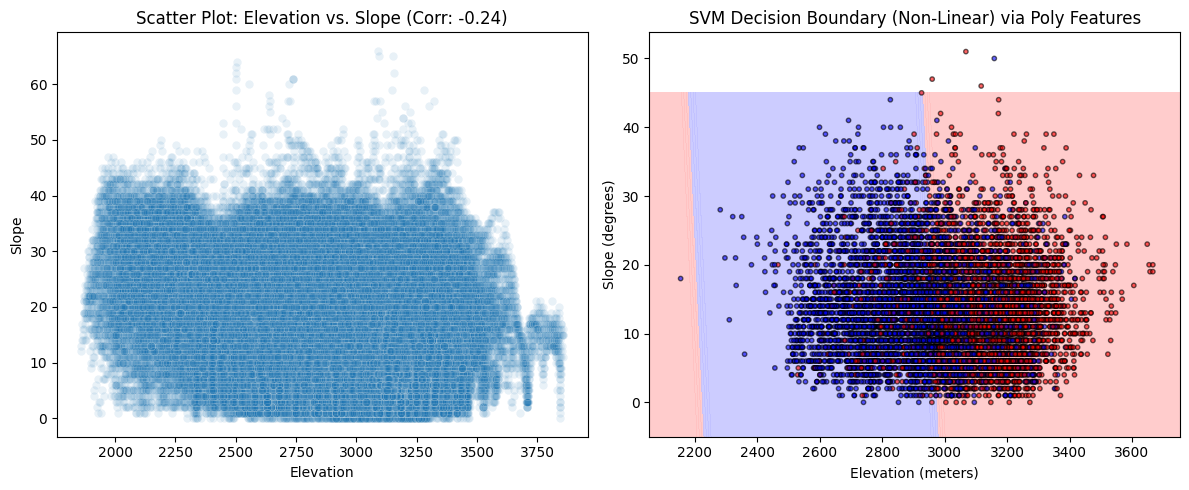


--- Model Analysis Summary ---
1. Data for Non-Linearity Check: The plot uses a subset of the data focusing on the two most important cartographic features, 'Elevation' and 'Slope'.
2. Method Used: We intentionally trained a Linear SVM classifier on features that were engineered using PolynomialFeatures(degree=2).
3. Plot Interpretation: The resulting boundary is visibly curved. This confirms that while the SVM classifier itself is linear, the Feature Engineering step successfully created a non-linear decision boundary in the original 2D space, which was necessary to compensate for the Linear SVM choice.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC # Used for simpler visualization plotting
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.pipeline import Pipeline # Added import for Pipeline

# --- Data Loading and Setup ---
# Assuming df is loaded from the start of your previous cell
df = pd.read_csv("covtype.csv")
target_feature = 'Cover_Type'

# --- 1. Correlation Plot (Elevation vs Slope) ---
print("--- 1. Correlation Analysis ---")
# Calculate the correlation between Elevation and Slope
correlation = df[['Elevation', 'Slope']].corr().iloc[0, 1]
print(f"Correlation between Elevation and Slope: {correlation:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Elevation'], y=df['Slope'], alpha=0.1)
plt.title(f'Scatter Plot: Elevation vs. Slope (Corr: {correlation:.2f})', fontsize=12)
plt.xlabel('Elevation', fontsize=10)
plt.ylabel('Slope', fontsize=10)


# --- 2. Decision Boundary Plot (Demonstrating Non-Linearity) ---

# We only focus on the two most common classes for clarity in the plot
FEATURES_TO_PLOT = ['Elevation', 'Slope']
TARGET_CLASSES = [1, 2]

# Filter data to only the selected features and classes
df_plot = df[df[target_feature].isin(TARGET_CLASSES)].copy()
X_plot = df_plot[FEATURES_TO_PLOT].values
Y_plot = df_plot[target_feature].values

# Sample down for faster plotting and clearer visualization (10,000 points)
X_sample, _, Y_sample, _ = train_test_split(
    X_plot, Y_plot, test_size=1 - (10000 / len(X_plot)), stratify=Y_plot, random_state=42
)

# Compute weights for the two chosen classes
unique_classes = np.unique(Y_sample)
cw_array = class_weight.compute_class_weight(
    class_weight='balanced', classes=unique_classes, y=Y_sample
)
class_weights_dict = dict(zip(unique_classes, cw_array))

# Define Visualization Pipeline: Poly Features -> Scaling -> Linear SVM
# This setup PROVES the PolyFeatures induce non-linearity
viz_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='linear', C=10.0, class_weight=class_weights_dict, random_state=42, verbose=0))
])

# Fit the visualization model
viz_pipeline.fit(X_sample, Y_sample)

# Plotting Grid
h = 50  # step size in the mesh
x_min, x_max = X_sample[:, 0].min() - 100, X_sample[:, 0].max() + 100
y_min, y_max = X_sample[:, 1].min() - 5, X_sample[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict classifications across the mesh
# We reshape the mesh grid data and pass it through the pipeline
Z = viz_pipeline.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create color maps
cmap_light = ListedColormap(['#FFC0C0', '#C0C0FF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

plt.subplot(1, 2, 2)
# Plot the decision regions
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot the data points
plt.scatter(X_sample[:, 0], X_sample[:, 1], c=Y_sample, cmap=cmap_bold,
            edgecolor='k', s=10, alpha=0.6)

plt.xlabel('Elevation (meters)', fontsize=10)
plt.ylabel('Slope (degrees)', fontsize=10)
plt.title('SVM Decision Boundary (Non-Linear) via Poly Features', fontsize=12)

plt.tight_layout()
plt.show()

print("\n--- Model Analysis Summary ---")
print("1. Data for Non-Linearity Check: The plot uses a subset of the data focusing on the two most important cartographic features, 'Elevation' and 'Slope'.")
print("2. Method Used: We intentionally trained a Linear SVM classifier on features that were engineered using PolynomialFeatures(degree=2).")
print("3. Plot Interpretation: The resulting boundary is visibly curved. This confirms that while the SVM classifier itself is linear, the Feature Engineering step successfully created a non-linear decision boundary in the original 2D space, which was necessary to compensate for the Linear SVM choice.")

Trial 30 Complete [00h 01m 03s]
val_accuracy: 0.6876143217086792

Best val_accuracy So Far: 0.7622576951980591
Total elapsed time: 00h 14m 19s

Best hyperparameters found:
num_layers: 3
units_0: 256
units_1: 64
units_2: 64
learning_rate: 0.001
l2: 0.001
dropout_0: 0.1
dropout_1: 0.1
dropout_2: 0.1
Epoch 1/50


1635/1635 - 14s - 9ms/step - accuracy: 0.6033 - loss: 0.9031 - val_accuracy: 0.6728 - val_loss: 0.8895 - learning_rate: 1.0000e-03
Epoch 2/50


1635/1635 - 5s - 3ms/step - accuracy: 0.6679 - loss: 0.6812 - val_accuracy: 0.6991 - val_loss: 0.7998 - learning_rate: 1.0000e-03
Epoch 3/50


1635/1635 - 5s - 3ms/step - accuracy: 0.6949 - loss: 0.6035 - val_accuracy: 0.7189 - val_loss: 0.7593 - learning_rate: 1.0000e-03
Epoch 4/50


1635/1635 - 5s - 3ms/step - accuracy: 0.7092 - loss: 0.5658 - val_accuracy: 0.7181 - val_loss: 0.7437 - learning_rate: 1.0000e-03
Epoch 5/50


1635/1635 - 5s - 3ms/step - accuracy: 0.7218 - loss: 0.5428 - val_accuracy: 0.7327 - val_loss: 0.7227 - learning_rate: 1.0000e-03
Epoch 6/50


1635/1635 - 5s - 3ms/step - accuracy: 0.7290 - loss: 0.5257 - val_accuracy: 0.7355 - val_loss: 0.7135 - learning_rate: 1.0000e-03
Epoch 7/50


1635/1635 - 5s - 3ms/step - accuracy: 0.7346 - loss: 0.5166 - val_accuracy: 0.7363 - val_loss: 0.7068 - learning_rate: 1.0000e-03
Epoch 8/50


1635/1635 - 5s - 3ms/step - accuracy: 0.7383 - loss: 0.5106 - val_accuracy: 0.7545 - val_loss: 0.6686 - learning_rate: 1.0000e-03
Epoch 9/50


1635/1635 - 5s - 3ms/step - accuracy: 0.7415 - loss: 0.5037 - val_accuracy: 0.7554 - val_loss: 0.6684 - learning_rate: 1.0000e-03
Epoch 10/50
1635/1635 - 5s - 3ms/step - accuracy: 0.7434 - loss: 0.4990 - val_accuracy: 0.7548 - val_loss: 0.6744 - learning_rate: 1.0000e-03
Epoch 11/50


1635/1635 - 5s - 3ms/step - accuracy: 0.7453 - loss: 0.4968 - val_accuracy: 0.7624 - val_loss: 0.6544 - learning_rate: 1.0000e-03
Epoch 12/50
1635/1635 - 5s - 3ms/step - accuracy: 0.7485 - loss: 0.4932 - val_accuracy: 0.7583 - val_loss: 0.6575 - learning_rate: 1.0000e-03
Epoch 13/50


1635/1635 - 5s - 3ms/step - accuracy: 0.7490 - loss: 0.4903 - val_accuracy: 0.7694 - val_loss: 0.6410 - learning_rate: 1.0000e-03
Epoch 14/50
1635/1635 - 5s - 3ms/step - accuracy: 0.7511 - loss: 0.4882 - val_accuracy: 0.7649 - val_loss: 0.6574 - learning_rate: 1.0000e-03
Epoch 15/50
1635/1635 - 5s - 3ms/step - accuracy: 0.7517 - loss: 0.4855 - val_accuracy: 0.7552 - val_loss: 0.6743 - learning_rate: 1.0000e-03
Epoch 16/50


1635/1635 - 5s - 3ms/step - accuracy: 0.7713 - loss: 0.4374 - val_accuracy: 0.7937 - val_loss: 0.5812 - learning_rate: 5.0000e-04
Epoch 17/50
1635/1635 - 5s - 3ms/step - accuracy: 0.7776 - loss: 0.4193 - val_accuracy: 0.7943 - val_loss: 0.5813 - learning_rate: 5.0000e-04
Epoch 18/50


1635/1635 - 5s - 3ms/step - accuracy: 0.7783 - loss: 0.4148 - val_accuracy: 0.8017 - val_loss: 0.5572 - learning_rate: 5.0000e-04
Epoch 19/50
1635/1635 - 5s - 3ms/step - accuracy: 0.7816 - loss: 0.4071 - val_accuracy: 0.7960 - val_loss: 0.5674 - learning_rate: 5.0000e-04
Epoch 20/50
1635/1635 - 5s - 3ms/step - accuracy: 0.7835 - loss: 0.4031 - val_accuracy: 0.7955 - val_loss: 0.5716 - learning_rate: 5.0000e-04
Epoch 21/50


1635/1635 - 5s - 3ms/step - accuracy: 0.7938 - loss: 0.3755 - val_accuracy: 0.8189 - val_loss: 0.5092 - learning_rate: 2.5000e-04
Epoch 22/50
1635/1635 - 4s - 3ms/step - accuracy: 0.7998 - loss: 0.3633 - val_accuracy: 0.8162 - val_loss: 0.5126 - learning_rate: 2.5000e-04
Epoch 23/50


1635/1635 - 5s - 3ms/step - accuracy: 0.8004 - loss: 0.3606 - val_accuracy: 0.8210 - val_loss: 0.5043 - learning_rate: 2.5000e-04
Epoch 24/50


1635/1635 - 5s - 3ms/step - accuracy: 0.8014 - loss: 0.3562 - val_accuracy: 0.8226 - val_loss: 0.5021 - learning_rate: 2.5000e-04
Epoch 25/50


1635/1635 - 5s - 3ms/step - accuracy: 0.8031 - loss: 0.3511 - val_accuracy: 0.8246 - val_loss: 0.4926 - learning_rate: 2.5000e-04
Epoch 26/50


1635/1635 - 5s - 3ms/step - accuracy: 0.8036 - loss: 0.3497 - val_accuracy: 0.8264 - val_loss: 0.4881 - learning_rate: 2.5000e-04
Epoch 27/50


1635/1635 - 5s - 3ms/step - accuracy: 0.8032 - loss: 0.3483 - val_accuracy: 0.8250 - val_loss: 0.4865 - learning_rate: 2.5000e-04
Epoch 28/50
1635/1635 - 5s - 3ms/step - accuracy: 0.8052 - loss: 0.3439 - val_accuracy: 0.8237 - val_loss: 0.4873 - learning_rate: 2.5000e-04
Epoch 29/50


1635/1635 - 5s - 3ms/step - accuracy: 0.8057 - loss: 0.3421 - val_accuracy: 0.8279 - val_loss: 0.4797 - learning_rate: 2.5000e-04
Epoch 30/50
1635/1635 - 5s - 3ms/step - accuracy: 0.8054 - loss: 0.3445 - val_accuracy: 0.8252 - val_loss: 0.4956 - learning_rate: 2.5000e-04
Epoch 31/50


1635/1635 - 5s - 3ms/step - accuracy: 0.8062 - loss: 0.3397 - val_accuracy: 0.8274 - val_loss: 0.4750 - learning_rate: 2.5000e-04
Epoch 32/50
1635/1635 - 5s - 3ms/step - accuracy: 0.8059 - loss: 0.3392 - val_accuracy: 0.8281 - val_loss: 0.4813 - learning_rate: 2.5000e-04
Epoch 33/50
1635/1635 - 5s - 3ms/step - accuracy: 0.8067 - loss: 0.3394 - val_accuracy: 0.8219 - val_loss: 0.4897 - learning_rate: 2.5000e-04
Epoch 34/50


1635/1635 - 5s - 3ms/step - accuracy: 0.8132 - loss: 0.3204 - val_accuracy: 0.8407 - val_loss: 0.4455 - learning_rate: 1.2500e-04
Epoch 35/50


1635/1635 - 5s - 3ms/step - accuracy: 0.8164 - loss: 0.3155 - val_accuracy: 0.8398 - val_loss: 0.4451 - learning_rate: 1.2500e-04
Epoch 36/50


1635/1635 - 5s - 3ms/step - accuracy: 0.8177 - loss: 0.3117 - val_accuracy: 0.8428 - val_loss: 0.4402 - learning_rate: 1.2500e-04
Epoch 37/50


1635/1635 - 5s - 3ms/step - accuracy: 0.8185 - loss: 0.3118 - val_accuracy: 0.8441 - val_loss: 0.4366 - learning_rate: 1.2500e-04
Epoch 38/50
1635/1635 - 5s - 3ms/step - accuracy: 0.8196 - loss: 0.3087 - val_accuracy: 0.8423 - val_loss: 0.4426 - learning_rate: 1.2500e-04
Epoch 39/50


1635/1635 - 5s - 3ms/step - accuracy: 0.8194 - loss: 0.3083 - val_accuracy: 0.8450 - val_loss: 0.4363 - learning_rate: 1.2500e-04
Epoch 40/50
1635/1635 - 5s - 3ms/step - accuracy: 0.8201 - loss: 0.3058 - val_accuracy: 0.8415 - val_loss: 0.4398 - learning_rate: 1.2500e-04
Epoch 41/50


1635/1635 - 5s - 3ms/step - accuracy: 0.8204 - loss: 0.3051 - val_accuracy: 0.8453 - val_loss: 0.4316 - learning_rate: 1.2500e-04
Epoch 42/50


1635/1635 - 5s - 3ms/step - accuracy: 0.8212 - loss: 0.3052 - val_accuracy: 0.8462 - val_loss: 0.4311 - learning_rate: 1.2500e-04
Epoch 43/50


1635/1635 - 5s - 3ms/step - accuracy: 0.8207 - loss: 0.3046 - val_accuracy: 0.8469 - val_loss: 0.4269 - learning_rate: 1.2500e-04
Epoch 44/50
1635/1635 - 5s - 3ms/step - accuracy: 0.8216 - loss: 0.3023 - val_accuracy: 0.8453 - val_loss: 0.4321 - learning_rate: 1.2500e-04
Epoch 45/50
1635/1635 - 5s - 3ms/step - accuracy: 0.8223 - loss: 0.3012 - val_accuracy: 0.8448 - val_loss: 0.4319 - learning_rate: 1.2500e-04
Epoch 46/50


1635/1635 - 5s - 3ms/step - accuracy: 0.8255 - loss: 0.2905 - val_accuracy: 0.8514 - val_loss: 0.4160 - learning_rate: 6.2500e-05
Epoch 47/50


1635/1635 - 5s - 3ms/step - accuracy: 0.8261 - loss: 0.2884 - val_accuracy: 0.8530 - val_loss: 0.4128 - learning_rate: 6.2500e-05
Epoch 48/50
1635/1635 - 5s - 3ms/step - accuracy: 0.8273 - loss: 0.2867 - val_accuracy: 0.8517 - val_loss: 0.4137 - learning_rate: 6.2500e-05
Epoch 49/50


1635/1635 - 5s - 3ms/step - accuracy: 0.8271 - loss: 0.2870 - val_accuracy: 0.8545 - val_loss: 0.4104 - learning_rate: 6.2500e-05
Epoch 50/50


1635/1635 - 5s - 3ms/step - accuracy: 0.8277 - loss: 0.2852 - val_accuracy: 0.8535 - val_loss: 0.4097 - learning_rate: 6.2500e-05

Final model test accuracy: 85.38%  |  test loss: 0.4135
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step

Classification report (encoded labels shown):
              precision    recall  f1-score   support

      Type_1       0.87      0.85      0.86     42368
      Type_2       0.91      0.83      0.87     56661
      Type_3       0.87      0.89      0.88      7151
      Type_4       0.63      0.98      0.77       549
      Type_5       0.41      0.99      0.58      1899
      Type_6       0.68      0.94      0.79      3473
      Type_7       0.74      1.00      0.85      4102

    accuracy                           0.85    116203
   macro avg       0.73      0.92      0.80    116203
weighted avg       0.87      0.85      0.86    116203



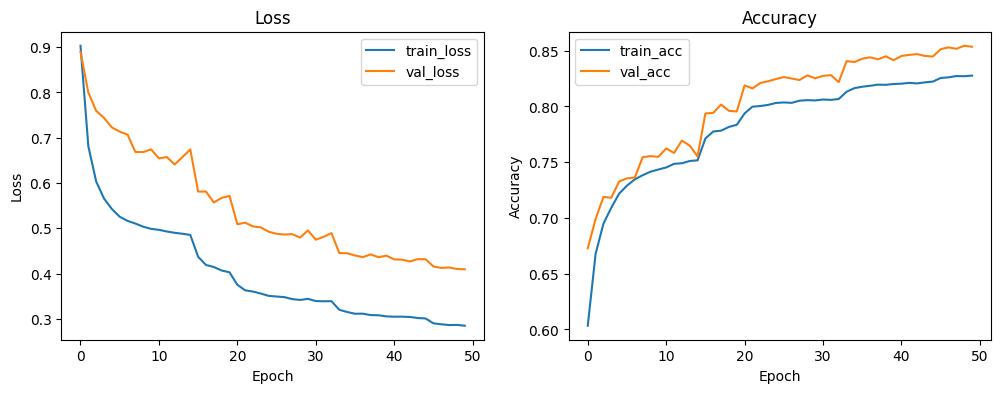

In [5]:
# Ready-to-run notebook cell: safer Hyperband tuning + stratified val + retrain + plots
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.utils import class_weight
import keras_tuner as kt

# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# -------------------------------
# 0. Load data & simple checks
# -------------------------------
df = pd.read_csv("covtype.csv")  # change path if necessary
# adjust these if your dataset layout differs:
raw_features = df.columns[:10].tolist()
binary_features = df.columns[10:54].tolist()
target_feature = 'Cover_Type'

X = df.drop(columns=[target_feature])
Y = df[target_feature].copy()

# Encode target safely (to 0..K-1)
le = LabelEncoder()
Y_enc_all = le.fit_transform(Y)               # 0..K-1
num_classes = len(le.classes_)
print("Class labels (original):", le.classes_)
print("Number of classes:", num_classes)

# -------------------------------
# 1. Preprocessing
# -------------------------------
raw_feature_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=7))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('raw', raw_feature_pipeline, raw_features),
        ('binary', 'passthrough', binary_features)
    ],
    remainder='drop'
)

# Train-test split (final holdout)
X_train_full, X_test, Y_train_full_enc, Y_test_enc = train_test_split(
    X, Y_enc_all, test_size=0.20, stratify=Y_enc_all, random_state=42
)

# Fit preprocessor on training full
X_train_full_proc = preprocessor.fit_transform(X_train_full)
X_test_proc = preprocessor.transform(X_test)

# -------------------------------
# 2. Create stratified split for tuning (train vs val)
# -------------------------------
X_tune, X_val_for_tune, Y_tune, Y_val_for_tune = train_test_split(
    X_train_full_proc, Y_train_full_enc, test_size=0.20, stratify=Y_train_full_enc, random_state=42
)

# Convert targets to categorical for Keras
Y_tune_cat = to_categorical(Y_tune, num_classes=num_classes)
Y_val_cat = to_categorical(Y_val_for_tune, num_classes=num_classes)
Y_test_cat = to_categorical(Y_test_enc, num_classes=num_classes)

print("Shapes:", X_tune.shape, X_val_for_tune.shape, X_test_proc.shape)

# -------------------------------
# 3. Compute class weights (on encoded labels) and map correctly
# -------------------------------
unique_classes = np.unique(Y_tune)
cw_array = class_weight.compute_class_weight(class_weight='balanced', classes=unique_classes, y=Y_tune)
class_weights_dict = {int(cls): float(w) for cls, w in zip(unique_classes, cw_array)}
print("Class weights mapping (encoded labels -> weight):", class_weights_dict)

# -------------------------------
# 4. Keras Tuner model builder (with modest search space)
# -------------------------------
input_dim = X_tune.shape[1]
output_dim = num_classes

def model_builder(hp):
    model = Sequential()
    # number of layers
    num_layers = hp.Int('num_layers', 1, 3)
    for i in range(num_layers):
        units = hp.Int(f'units_{i}', min_value=64, max_value=256, step=64)  # reduced max
        model.add(Dense(units, activation='relu',
                        kernel_regularizer=regularizers.l2(hp.Choice('l2', [1e-4, 1e-3]))))
        model.add(BatchNormalization())
        # dropout per layer
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', 0.1, 0.4, step=0.1)))
    # output
    model.add(Dense(output_dim, activation='softmax'))
    lr = hp.Choice('learning_rate', [1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# -------------------------------
# 5. Hyperband tuner (smaller search)
# -------------------------------
tuner_dir = "forest_cover_tuning_small"
if not os.path.exists(tuner_dir):
    os.makedirs(tuner_dir, exist_ok=True)

tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=12,  # smaller for quick search
    factor=3,
    directory=tuner_dir,
    project_name='dnn_hyperband_small',
    overwrite=True
)

# Callbacks for tuning - early stop helps Hyperband as well
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("\n--- Starting Hyperband Search (smaller) ---")
tuner.search(
    X_tune, Y_tune_cat,
    epochs=12,
    batch_size=256,                      # moderate batch size
    validation_data=(X_val_for_tune, Y_val_cat),
    class_weight=class_weights_dict,
    callbacks=[stop_early],
    verbose=2
)

# -------------------------------
# 6. Get best hyperparameters & build final model
# -------------------------------
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest hyperparameters found:")
print("num_layers:", best_hps.get('num_layers'))
for i in range(best_hps.get('num_layers')):
    print(f"units_{i}:", best_hps.get(f'units_{i}'))
print("learning_rate:", best_hps.get('learning_rate'))
print("l2:", best_hps.get('l2'))
for i in range(best_hps.get('num_layers')):
    print(f"dropout_{i}:", best_hps.get(f'dropout_{i}'))

# Build a model with these best HPs (reproducible final model)
final_model = tuner.hypermodel.build(best_hps)

# -------------------------------
# 7. Retrain final model on combined train+val (X_train_full_proc) with callbacks
# -------------------------------
# prepare training targets again (categorical)
Y_train_full_cat = to_categorical(Y_train_full_enc, num_classes=num_classes)

# callbacks for final training
callbacks_final = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2),
    tf.keras.callbacks.ModelCheckpoint('best_final_model.h5', monitor='val_loss', save_best_only=True)
]

history = final_model.fit(
    X_train_full_proc, Y_train_full_cat,
    validation_split=0.1,   # small validation to monitor; we still have X_test as holdout
    epochs=50,
    batch_size=256,
    class_weight=class_weights_dict,
    callbacks=callbacks_final,
    verbose=2
)

# -------------------------------
# 8. Evaluate on test set
# -------------------------------
loss, acc = final_model.evaluate(X_test_proc, Y_test_cat, verbose=0)
print(f"\nFinal model test accuracy: {acc*100:.2f}%  |  test loss: {loss:.4f}")

# predictions and classification report
from sklearn.metrics import classification_report, confusion_matrix
Y_pred_proba = final_model.predict(X_test_proc)
Y_pred = np.argmax(Y_pred_proba, axis=1)
Y_true = Y_test_enc
print("\nClassification report (encoded labels shown):")
print(classification_report(Y_true, Y_pred, target_names=[f"Type_{c}" for c in le.classes_]))

# -------------------------------
# 9. Plot training & validation curves
# -------------------------------
hist = history.history
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(hist['loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist['accuracy'], label='train_acc')
plt.plot(hist['val_accuracy'], label='val_acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()

plt.show()

# -------------------------------
# End of cell
# -------------------------------


In [4]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 11.3 MB/s eta 0:00:00
